In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read "twitter-archive-enhanced.csv" to pandas DF

In [2]:
os.listdir("data/")

['image-predictions.tsv', 'tweet-json.txt', 'twitter-archive-enhanced.csv']

In [3]:
pd_archive = pd.read_csv("data/twitter-archive-enhanced.csv")

In [4]:
pd_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
pd_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Get predictions data

> *Requests doesn't work within Volvo's net. Using the file directly instead..*

In [6]:
# import requests
# link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# r = requests.get(link)

In [7]:
pd_prediction = pd.read_csv("data/image-predictions.tsv", sep = "\t")
pd_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [8]:
pd_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Tweepy
> **Did not want to create a Twitter account, this code is directly from UDACITY**

In [9]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

## Read "tweet-json"

> Should only have "tweet ID, retweet count, and favorite count"

In [10]:
tweet_json = pd.DataFrame()
tweet_id = []
retweet_count = []
favorite_count = []

with open("data/tweet-json.txt") as f:
    for i in f:
#         print(i)
        dic = eval(i.replace("false","False").replace("null","None").replace("true","True"))
        tweet_id.append(dic["id"])
        retweet_count.append(dic["retweet_count"])
        favorite_count.append(dic["favorite_count"])

pd_tweet_json = pd.DataFrame({"tweet_id":tweet_id,"retweet_count":retweet_count,"favorite_count":favorite_count})

In [11]:
pd_tweet_json.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [12]:
pd_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Data Assessment
## Identified issues in data


### twitter-archive-enhanced.csv: "pd_archive"
#### Quality
> "source" have additional html data: "<a href="," "rel="nofollow">Twitter for iPhone</a>'"

> Incorrect names such as: **"actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad','my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'"** among other

> The doggo floofer pupper puppo columns can be transformed to a single column with these names as categories.

> Removal of retweets
    
> twitter id 746818907684614144 have an incorrect rating translation from text to the numerator column (related to text format)

> twitter id 835246439529840640 have an incorrect rating translation from text to the numerator column (related to text identification)

#### Tidiness
> Remove doggo floofer pupper puppo columns
    
### image-predictions.tsv: "pd_prediction"
#### Quality
> Duplicate link pictures in pd_prediction["jpg_url"]. Depending on the analysis, it may be redundant to classify the same picture several times. On the other hand, if one of the goal of the analysis is to simply identify tweets with dogs in them, the duplicate link pictures may still be relevant.

> The NN doesn't identify a dog in the picture for p1_dog, p2_dog, p3_dog, for some tweets

#### Tidiness
> Remove redundant columns with no additional information
    
### tweet-json.txt: "pd_tweet_json"
#### Quality
> Nothing identified..
                                          
#### Tidiness
> Nothing identified..

    
## General
### Tidiness
> Create a master dataframe
    

# pd_archive

In [13]:
pd_archive[0:50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
set(pd_archive["text"])

{"This is Colby. He's currently regretting all those times he shook your hand for an extra treat. 12/10 https://t.co/vtVHtKFtBH",
 'This is Atlas. Swinging is his passion. 12/10 would push all day https://t.co/9k8LLjJ0uJ',
 "RT @dog_rates: Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://…",
 'This is Cooper. Someone attacked him with a sharpie. Poor pupper. 11/10 nifty tongue slip tho https://t.co/01vpuRDXQ8',
 "This is Misty. She's in a predicament. Not sure what next move should be. 9/10 stay calm pupper I'm comin https://t.co/XhR7PAgcwF",
 'This is life-changing. 12/10 https://t.co/SroTpI6psB',
 'When you ask your professor about extra credit on the last day of class. 8/10 https://t.co/H6rqZyE4NP',
 "Meet Stanley. He likes road trips. Will shift for you. One ear more effective than other. 13/10 we don't leave until you buckle pup Stanley https://t.co/vmCu3PFCQq",
 'Here we have a mixed Asiago from the Galá

In [15]:
# Tweet ID 746818907684614144 have an incorrecty identified rating..? Could be more with these faults. Also there is a decimal in the rating it seems.
pd_archive[pd_archive["text"] == "Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None


In [16]:
# Found a tweet with a wrong identification on the rating. Should be 13/10, now it's 960/10
list(pd_archive[pd_archive["tweet_id"] == 835246439529840640]["text"])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]

In [17]:
# Incorrect names
np.sort(list(set(pd_archive["name"].sort_values())))

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [18]:
# Various websites in expanded URLs. Also NaN values within the column. Not neccesarily a quality issue, nevertheless worth mentioning
print(pd_archive["expanded_urls"].sort_values())
print(pd_archive["expanded_urls"].info())

1265    http://goo.gl/ArWZfi,https://twitter.com/dog_r...
444     http://us.blastingnews.com/news/2017/01/200-do...
391     http://us.blastingnews.com/news/2017/01/kentuc...
335     http://us.blastingnews.com/news/2017/02/jfk-an...
204     http://www.gofundme.com/bluethewhitehusky,http...
                              ...                        
1940                                                  NaN
2038                                                  NaN
2149                                                  NaN
2189                                                  NaN
2298                                                  NaN
Name: expanded_urls, Length: 2356, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: expanded_urls
Non-Null Count  Dtype 
--------------  ----- 
2297 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB
None


In [19]:
# containts web-data in link
pd_archive["source"]

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [20]:
# Check for nan values. This tells us that there are 2175 original tweets.
print(len(pd_archive[pd_archive["retweeted_status_id"].isna()]))
print(len(pd_archive[pd_archive["retweeted_status_user_id"].isna()]))
print(len(pd_archive[pd_archive["retweeted_status_timestamp"].isna()]))

2175
2175
2175


In [21]:
# Remove retweets, keep original.
pd_archive[pd_archive["retweeted_status_id"].isna()].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [22]:
print(set(pd_archive["doggo"]))
print(set(pd_archive["floofer"]))
print(set(pd_archive["pupper"]))
print(set(pd_archive["puppo"]))

{'doggo', 'None'}
{'floofer', 'None'}
{'None', 'pupper'}
{'None', 'puppo'}


## Copy DF

In [23]:
pd_archive_clean = pd_archive.copy()

## Clean pd_archive

In [24]:
# Rating extraction wrong..? "Guys... Dog Jesus 2.0\n13/10 buoyant af..."
pd_archive_clean[pd_archive_clean["tweet_id"] == 746818907684614144]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None


In [25]:
# Remove tweet with incorrectly identified rating (could be more). Not sure if this is right or wrong due to weird format in text
pd_archive_clean = pd_archive_clean[~(pd_archive_clean["tweet_id"] == 746818907684614144)]
print(len(pd_archive_clean[pd_archive_clean["tweet_id"] == 746818907684614144]))

0


In [26]:
# Rating extraction definitely wrong
pd_archive_clean[pd_archive_clean["tweet_id"] == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [27]:
# Remove and verify its gone
pd_archive_clean = pd_archive_clean[~(pd_archive_clean["tweet_id"] == 835246439529840640)]
print(len(pd_archive_clean[pd_archive_clean["tweet_id"] == 835246439529840640]))

0


In [28]:
# Remove retweets
print("Before removing retweets {}".format(len(pd_archive_clean)))
pd_archive_clean = pd_archive_clean[pd_archive_clean["retweeted_status_id"].isna()].reset_index(drop=True)
print("After removing retweets {}".format(len(pd_archive_clean)))


Before removing retweets 2354
After removing retweets 2173


In [29]:
# Remove incorrect names
print("Before removing incorrect names {}".format(len(pd_archive_clean)))
incorrect_names = ['a', 'actually', 'all', 'an', 'by', 'getting',
       'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad',
       'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such',
       'the', 'this', 'unacceptable', 'very', "None", "laptop", "paper_towel"]

pd_archive_clean = pd_archive_clean[~pd_archive_clean['name'].isin(incorrect_names)].reset_index(drop=True)
print("After removing incorrect names {}".format(len(pd_archive_clean)))

Before removing incorrect names 2173
After removing incorrect names 1391


In [30]:
# Remove html
print("Before: {}".format(list(set(pd_archive_clean["source"]))))
new_list = []
for i in pd_archive_clean["source"]:
    if "Twitter for iPhone" in i:
        new_list.append("Twitter for iPhone")
    if "TweetDeck" in i:
        new_list.append("TweetDeck")
    if "Twitter Web Client" in i:
        new_list.append("Twitter Web Client")
    if "Vine - Make a Scene" in i:
        new_list.append("Vine - Make a Scene")
pd_archive_clean["source"] = new_list
print("After: {}".format(list(set(pd_archive_clean["source"]))))

Before: ['<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>']
After: ['Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck', 'Twitter for iPhone']


In [31]:
# Drop columns with no information about original tweets
pd_archive_clean = pd_archive_clean.drop(columns = ["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","in_reply_to_status_id","in_reply_to_user_id"])

In [32]:
# Create a dog_stage column instead of 4 separate dog stage columns
dogs = ["doggo","floofer","pupper","puppo"]
dog_stage = pd_archive_clean[dogs].replace("None","0")[dogs[0]] + pd_archive_clean[dogs].replace("None","0")[dogs[1]] + pd_archive_clean[dogs].replace("None","0")[dogs[2]] + pd_archive_clean[dogs].replace("None","0")[dogs[3]]
print(set(dog_stage))
dog_stage = dog_stage.replace("0000",None).replace("000puppo","puppo").replace("00pupper0","pupper").replace("0floofer00","floofer").replace("doggo000","doggo").replace("doggo0pupper0","doggo pupper")
pd_archive_clean["dog_stage"] = dog_stage
pd_archive_clean = pd_archive_clean.drop(columns = dogs)

{'0000', '00pupper0', 'doggo000', '000puppo', '0floofer00', 'doggo0pupper0'}


In [33]:
# Calculate rating ratio
pd_archive_clean["rating_ratio"] = pd_archive_clean["rating_numerator"] / pd_archive_clean["rating_denominator"]

In [34]:
print(pd_archive_clean.head(3))
print(pd_archive_clean.info())

             tweet_id                  timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56 +0000  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27 +0000  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03 +0000  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name dog_stage  rating_ratio  
0                  10  Phineas      None           1.3  
1                  10    Tilly      None           1.3  
2                 

# pd_prediction

In [35]:
pd_prediction[0:50]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [36]:
print("Initial length before unique pictures: {}. Length after uniqueness {}".format(len(pd_prediction["jpg_url"]),len(set(pd_prediction["jpg_url"]))))

Initial length before unique pictures: 2075. Length after uniqueness 2009


In [37]:
# The NN doesn't identify dogs
pd_prediction[(pd_prediction["p1_dog"] == False) & (pd_prediction["p2_dog"] == False) & (pd_prediction["p3_dog"] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


## Copy DF

In [38]:
pd_prediction_clean = pd_prediction.copy()

## Clean pd_prediction

In [39]:
# Remove duplicates in jpg_url
print("Initial length before unique pictures: {}. Length after uniqueness {}".format(len(pd_prediction_clean["jpg_url"]),len(set(pd_prediction_clean["jpg_url"]))))
pd_prediction_clean = pd_prediction_clean.drop_duplicates("jpg_url")
print("Verify the length: {}".format(len(pd_prediction_clean)))

Initial length before unique pictures: 2075. Length after uniqueness 2009
Verify the length: 2009


In [40]:
# Remove the rows that weren't classified at all
pd_prediction_clean = pd_prediction_clean[~((pd_prediction_clean["p1_dog"] == False) & (pd_prediction_clean["p2_dog"] == False) & (pd_prediction_clean["p3_dog"] == False))]
print("Verify that the rows are removed: {}".format(len(pd_prediction_clean[((pd_prediction_clean["p1_dog"] == False) & (pd_prediction_clean["p2_dog"] == False) & (pd_prediction_clean["p3_dog"] == False))])))

Verify that the rows are removed: 0


In [41]:
# Create a dog column to easier identify the exact dog that has been classified.
dog = []
for p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog in zip(pd_prediction_clean["p1"],pd_prediction_clean["p1_conf"],pd_prediction_clean["p1_dog"],pd_prediction_clean["p2"],pd_prediction_clean["p2_conf"],pd_prediction_clean["p2_dog"],pd_prediction_clean["p3"],pd_prediction_clean["p3_conf"],pd_prediction_clean["p3_dog"]):
    if p1_dog == True:
        dog.append(p1)
        continue
    if p2_dog == True:
        dog.append(p2)
        continue
    if p3_dog == True:
        dog.append(p3)

pd_prediction_clean["dog"] = dog

In [42]:
pd_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1691 non-null   int64  
 1   jpg_url   1691 non-null   object 
 2   img_num   1691 non-null   int64  
 3   p1        1691 non-null   object 
 4   p1_conf   1691 non-null   float64
 5   p1_dog    1691 non-null   bool   
 6   p2        1691 non-null   object 
 7   p2_conf   1691 non-null   float64
 8   p2_dog    1691 non-null   bool   
 9   p3        1691 non-null   object 
 10  p3_conf   1691 non-null   float64
 11  p3_dog    1691 non-null   bool   
 12  dog       1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 150.3+ KB


# pd_tweet_json

In [43]:
pd_tweet_json[0:50]

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [44]:
print(len(set(pd_tweet_json["tweet_id"])))
print(len((pd_tweet_json["tweet_id"])))

2354
2354


In [45]:
pd_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Copy DF

In [46]:
pd_tweet_json_clean = pd_tweet_json.copy()

# Merge into a master dataframe

In [47]:
pd_master_df = pd.merge(pd_archive_clean, pd_prediction_clean, on = "tweet_id")
pd_master_df = pd.merge(pd_master_df, pd_tweet_json_clean, on = "tweet_id")

In [48]:
pd_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1186
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1187 non-null   int64  
 1   timestamp           1187 non-null   object 
 2   source              1187 non-null   object 
 3   text                1187 non-null   object 
 4   expanded_urls       1187 non-null   object 
 5   rating_numerator    1187 non-null   int64  
 6   rating_denominator  1187 non-null   int64  
 7   name                1187 non-null   object 
 8   dog_stage           150 non-null    object 
 9   rating_ratio        1187 non-null   float64
 10  jpg_url             1187 non-null   object 
 11  img_num             1187 non-null   int64  
 12  p1                  1187 non-null   object 
 13  p1_conf             1187 non-null   float64
 14  p1_dog              1187 non-null   bool   
 15  p2                  1187 non-null   object 
 16  p2_con

In [49]:
pd_master_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating_ratio,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.3,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.2,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,1.3,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,8964,42908


## Save dataframe

In [50]:
pd_master_df.to_csv("twitter_archive_master.csv",index = False)

# Analyzing and Visualizing Data

array([[<AxesSubplot:title={'center':'rating_ratio'}>]], dtype=object)

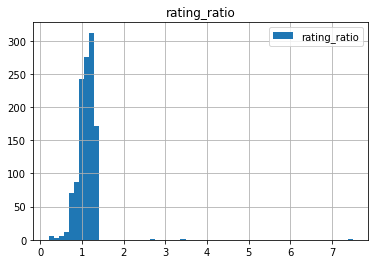

In [51]:
pd_master_df.hist("rating_ratio",bins = 60,legend = True)

## First insight & Visualization

Working on column: rating_ratio


Text(0, 0.5, 'Count')

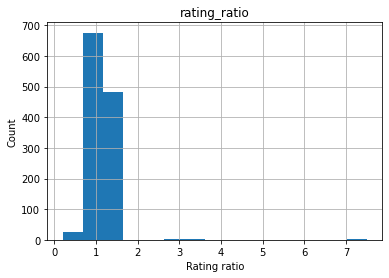

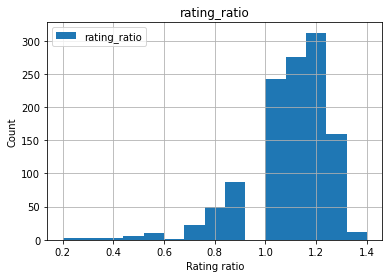

In [52]:
# Steal an outlier remover from https://stephenallwright.com/remove-outliers-pandas/ to 
# quick and easy remove extremes and visualize the histogram
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
    return df

# First insight is the ratio distribution is skewed and lots of data points are > 1, 
# which indicates that people tend to estimate a high rating for dogs, which makes perfectly sense!

pd_master_df.hist("rating_ratio",bins = 15)
plt.xlabel("Rating ratio")
plt.ylabel("Count")

remove_outliers(pd_master_df,["rating_ratio"],3).hist("rating_ratio",bins = 15,legend = True)
plt.xlabel("Rating ratio")
plt.ylabel("Count")


## Second insight

In [53]:
# The most "popular", in terms of rating, breed is golden retriever/ Labrador retriever / pembroke
print(pd_master_df[pd_master_df["rating_ratio"] > 1][["rating_ratio","dog"]].sort_values("rating_ratio").value_counts())

# The least "popular", in terms of rating, breed is pugs/chihuahua
print(pd_master_df[pd_master_df["rating_ratio"] < 1][["rating_ratio","dog"]].sort_values("rating_ratio").value_counts())

rating_ratio  dog                
1.2           golden_retriever       44
              Labrador_retriever     24
              Pembroke               23
1.3           golden_retriever       22
1.1           Pembroke               20
                                     ..
1.2           Rhodesian_ridgeback     1
              Norwich_terrier         1
              Norfolk_terrier         1
              Maltese_dog             1
7.5           Pomeranian              1
Length: 224, dtype: int64
rating_ratio  dog                     
0.9           Chihuahua                   8
              pug                         8
              toy_poodle                  5
              Chesapeake_Bay_retriever    4
0.8           Chihuahua                   3
                                         ..
0.7           Saint_Bernard               1
              Rottweiler                  1
              Pomeranian                  1
              Pekinese                    1
0.9           whippet

In [54]:
# We see that the dog breeds with top 3 rating in average is clumber, pomeranian and Appenzeller
pd_master_df[["rating_ratio","dog"]].groupby('dog').agg("mean").sort_values("rating_ratio")

,rating_ratio
dog,
Japanese_spaniel,0.500000
Ibizan_hound,0.850000
Walker_hound,0.875000
Scotch_terrier,0.900000
soft-coated_wheaten_terrier,0.914286
...,...
Saluki,1.233333
Border_terrier,1.233333
Appenzeller,1.300000


## Third insight

In [56]:
# Most of the tweets are sent from iphone..
pd_master_df["source"].value_counts()

Twitter for iPhone    1166
Twitter Web Client      13
TweetDeck                8
Name: source, dtype: int64

In [57]:
# Although few datapoints in Twitter web client and TweetDeck, we see a larger retweet and favorite count in the 
# "Twitter for iPhone" tweets. We also notice a larger rating_ratio for tweetdeck, but a lower favorite/retweet count. This
# could tell us that tweetdeck users overestimates the ratings of their dogs.
pd_master_df.groupby("source").agg("mean")[["rating_ratio","retweet_count","favorite_count"]]

,rating_ratio,retweet_count,favorite_count
source,,,
TweetDeck,1.100000,1778.750000,5038.750000
Twitter Web Client,1.015385,2201.846154,5232.615385
Twitter for iPhone,1.098598,2817.238422,9750.385935
